In [83]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## 

#### PREPROCESSING

In [ ]:
(X_train, y_train),(X_test,y_test) =datasets.cifar10.load_data()

In [ ]:
y_testr=y_test
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [146]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(10000,)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [87]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [88]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

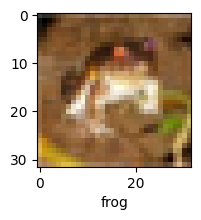

In [89]:
plot_sample(X_train,y_train,0)

In [90]:
X_train,X_test=X_train/255,X_test/255

In [96]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


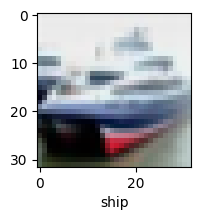

In [97]:
plot_sample(X_test,y_test,1)

##

## MODEL_CREATION

In [184]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

def create_cifar10_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu',strides=(2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu',strides=(2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu',strides=(2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  

    return model

model = create_cifar10_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,026 (1.38 MB)

 Trainable params: 360,106 (1.37 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [185]:
# Training with augmented data
model_history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.2816 - loss: 2.2865
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4879 - loss: 1.4253
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5741 - loss: 1.2045
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6278 - loss: 1.0670
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6606 - loss: 0.9603
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6960 - loss: 0.8784
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7151 - loss: 0.8213
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7320 - loss: 0.7719
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7476 - loss: 0.7334
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7613 - loss: 0.6915
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7722 - loss: 0.6623
Epoch 12

In [187]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8022 - loss: 0.6154
Test Loss: 0.6189, Test Accuracy: 0.7971


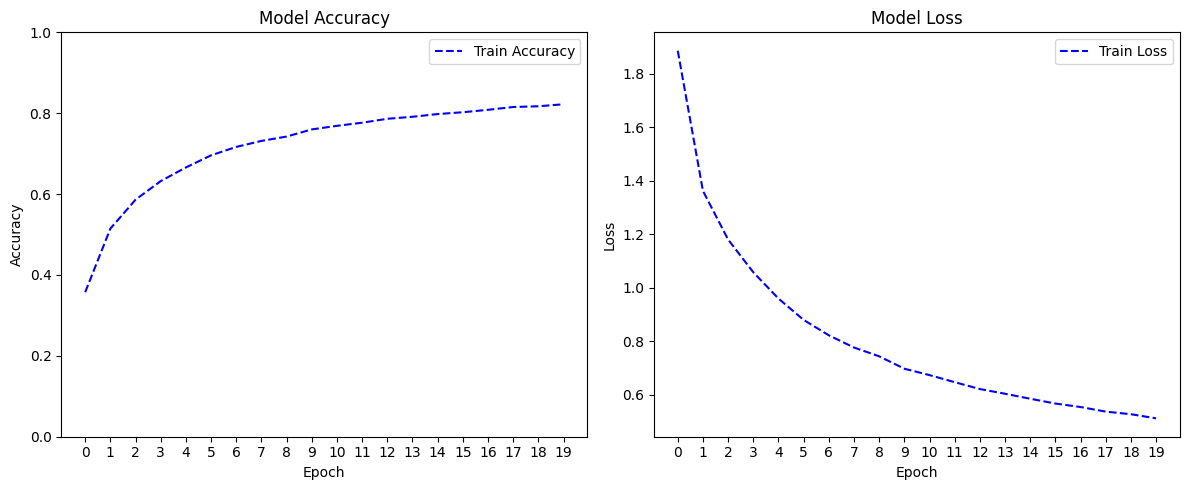

In [188]:
def plot_history(history):
    """
    Plots the training and validation accuracy and loss from model history.
    
    Parameters:
    - history: The History object returned by the model.fit() method.
    """
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 5))
    
    # Training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limits
    plt.xticks(range(len(history.history['accuracy'])))  # Show all epoch numbers on x-axis
    plt.legend()
    
    # Training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(len(history.history['loss'])))  # Show all epoch numbers on x-axis
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(model_history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Figure size 1000x800 with 0 Axes>

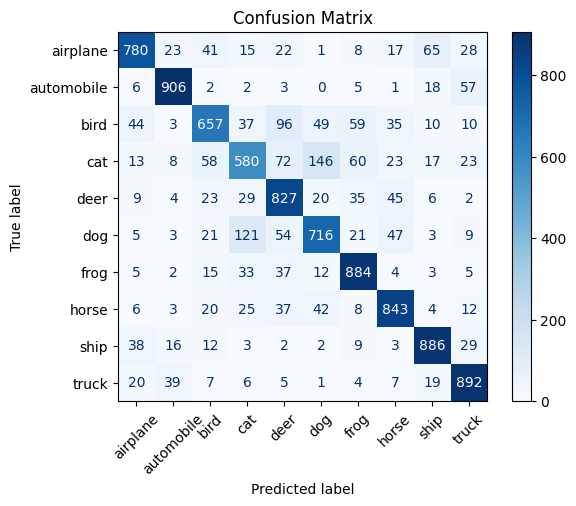

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the class labels for X_test
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(10))

# Plot the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm,classes)

In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict probabilities for the test set
y_probabilities = model.predict(X_test)

# Get the predicted class (predicted labels)
y_pred = y_probabilities.argmax(axis=1)

# Precision, recall, f1-score, and accuracy for multi-class classification
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Binarize the test labels for ROC-AUC and PR-AUC calculation (multi-class)
y_test_bin = label_binarize(y_test, classes=np.arange(10))

# Compute ROC-AUC and PR-AUC for multi-class classification
roc_auc = roc_auc_score(y_test_bin, y_probabilities, average='macro', multi_class='ovr')
pr_auc = average_precision_score(y_test_bin, y_probabilities, average='macro')

# Print results
print(f'Precision (macro): {precision:.4f}')
print(f'Recall (macro): {recall:.4f}')
print(f'F1 Score (macro): {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC (macro): {roc_auc:.4f}')
print(f'PR-AUC (macro): {pr_auc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision (macro): 0.7958
Recall (macro): 0.7971
F1 Score (macro): 0.7948
Accuracy: 0.7971
ROC-AUC (macro): 0.9769
PR-AUC (macro): 0.8768
